In [4]:
pip freeze

aiosmtplib==4.0.0
altair==5.5.0
altgraph==0.17.2
aniso8601==10.0.0
annotated-types==0.7.0
anyio==4.8.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
asyncpg==0.30.0
attrs==24.2.0
babel==2.16.0
bcrypt==4.3.0
beautifulsoup4==4.12.3
black==25.1.0
bleach==6.1.0
blinker==1.9.0
bottle==0.12.25
bottle-websocket==0.2.9
bson==0.5.10
cachetools==5.5.0
calc==1.0
certifi==2025.1.31
cffi==1.15.1
charset-normalizer==3.3.2
click==8.1.8
clipboard==0.0.4
cloudpickle==3.1.1
clr-loader==0.2.6
colorama==0.4.6
comm==0.2.2
commonmark==0.9.1
contourpy==1.3.0
cycler==0.12.1
databases==0.9.0
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.8
dnspython==2.7.0
dotenv==0.9.9
ecdsa==0.19.1
Eel==0.16.0
et-xmlfile==1.1.0
executing==2.0.1
fastapi==0.115.11
fastjsonschema==2.20.0
filelock==3.14.0
Flask==3.1.0
Flask-Login==0.6.3
Flask-RESTful==0.3.10
Flask-SQLAlchemy==3.1.1
fonttools==4.53.1
fqdn==1.5.1
future==1.0.0
gevent==24.2.1
gevent-websocket==0.10.1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import joblib as jbl
from warnings import filterwarnings
filterwarnings("ignore")

In [171]:
data = pd.read_csv("nigeria_houses_data.csv")

In [172]:
X

,bedrooms,bathrooms,toilets,parking_space,town,state,total_rooms,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,title_Terraced Duplexes
2,4.0,5.0,5.0,4.0,95,14,18.0,0,0,1,0,0,0,0
3,4.0,4.0,5.0,6.0,9,14,19.0,0,0,1,0,0,0,0
4,4.0,4.0,5.0,2.0,95,14,15.0,0,0,0,0,1,0,0
6,4.0,5.0,5.0,4.0,95,14,18.0,0,0,1,0,0,0,0
8,1.0,1.0,1.0,1.0,95,14,4.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,95,14,18.0,0,0,0,0,1,0,0
24320,3.0,4.0,4.0,5.0,95,14,16.0,0,0,1,0,0,0,0
24323,4.0,5.0,5.0,4.0,95,14,18.0,0,0,1,0,0,0,0
24324,3.0,4.0,4.0,3.0,136,14,14.0,1,0,0,0,0,0,0


In [173]:
data.head(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [175]:
data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


# Visualizing Categorical Data

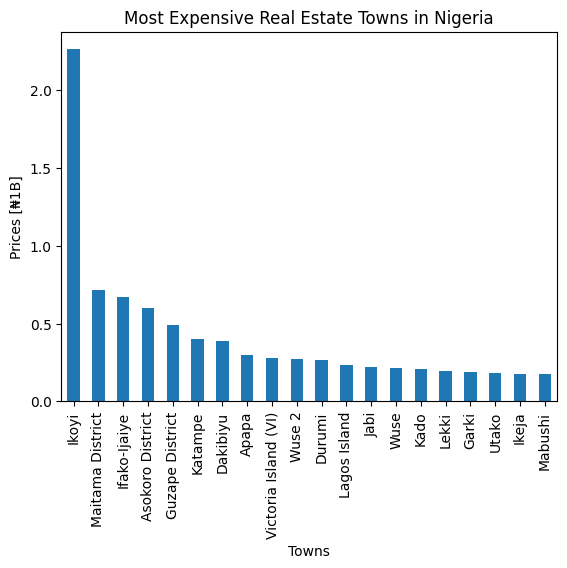

In [176]:
((data.groupby("town")['price']
    .mean()/1e9)
    .sort_values(ascending=False)
    .head(20)
    .plot(kind="bar",
         xlabel = 'Towns',
         ylabel = "Prices [₦1B]",
         title = "Most Expensive Real Estate Towns in Nigeria"));

In [177]:
data['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [178]:
data['title'].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

<Axes: xlabel='state'>

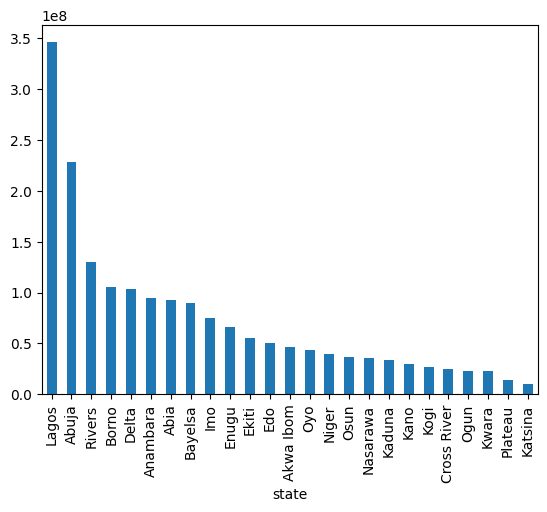

In [179]:
data.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='town'>

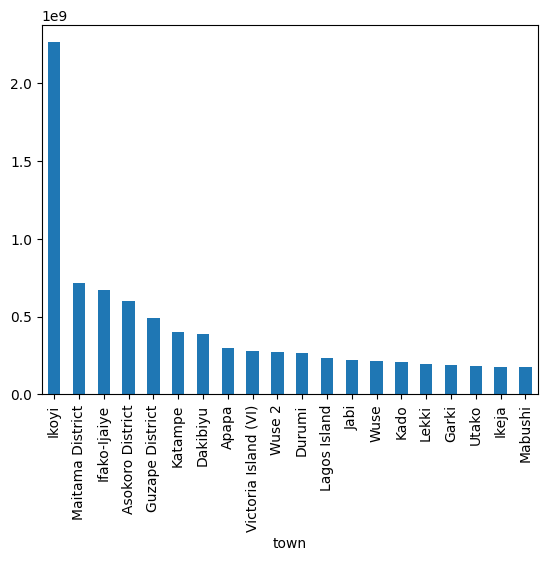

In [180]:
data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [181]:
data['total_rooms'] = data['bedrooms'] + data['bathrooms'] + data['toilets'] + data['parking_space']

In [182]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,20.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,18.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0


In [183]:
q1,q9 = data['price'].quantile([0.15, 0.85])
mask_data = data['price'].between(q1,q9)
trimmed_data = data[mask_data]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0,18.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14.0


In [184]:
records = trimmed_data['state'].value_counts()
records

state
Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: count, dtype: int64

In [185]:
trimmed_data = trimmed_data[~trimmed_data["state"].isin([records[records<50].index])]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0,18.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14.0


In [186]:
trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] + trimmed_data['parking_space']

In [187]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0,18.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14.0


In [188]:
trimmed_data['title'].unique()

array(['Detached Duplex', 'Semi Detached Duplex', 'Terraced Duplexes',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

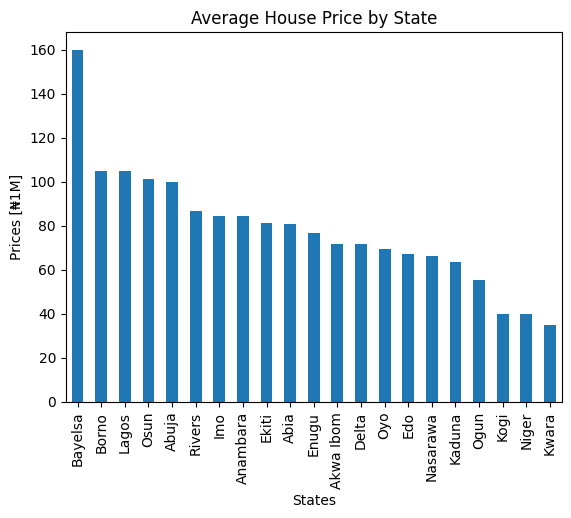

In [189]:
#States with the highest mean prices
(
    (trimmed_data.groupby("state")["price"].mean()/1e6)
    .sort_values(ascending=False)
    .plot(kind="bar",
         xlabel = "States", 
         ylabel = "Prices [₦1M]",
          title = "Average House Price by State"
        )
);

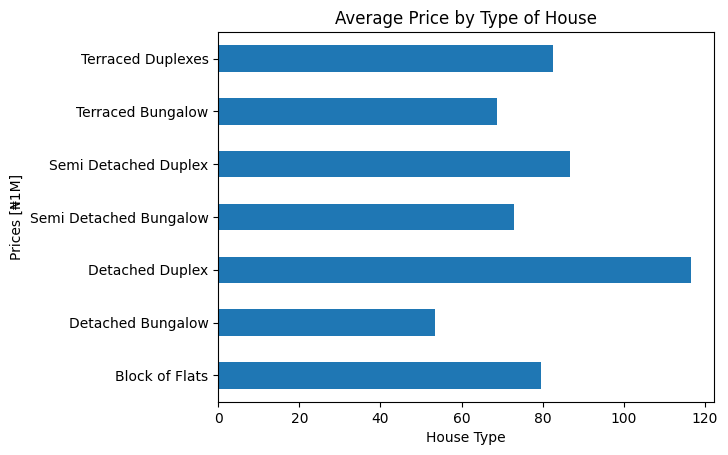

In [190]:
(
    (trimmed_data.groupby("title")["price"]
     .mean()/1e6)
    .plot(kind="barh",
          xlabel= 'House Type',
          ylabel = "Prices [₦1M]",
          title = "Average Price by Type of House"
         )
);

In [169]:
encoded_titles = pd.get_dummies(trimmed_data['title'], prefix='title')
trimmed_data = pd.concat([trimmed_data, encoded_titles], axis=1).drop(columns=['title'])
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,town,state,price,total_rooms,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,title_Terraced Duplexes
2,4.0,5.0,5.0,4.0,Lekki,Lagos,120000000.0,18.0,False,False,True,False,False,False,False
3,4.0,4.0,5.0,6.0,Ajah,Lagos,40000000.0,19.0,False,False,True,False,False,False,False
4,4.0,4.0,5.0,2.0,Lekki,Lagos,75000000.0,15.0,False,False,False,False,True,False,False
6,4.0,5.0,5.0,4.0,Lekki,Lagos,65000000.0,18.0,False,False,True,False,False,False,False
8,1.0,1.0,1.0,1.0,Lekki,Lagos,200000000.0,4.0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Lekki,Lagos,110000000.0,18.0,False,False,False,False,True,False,False
24320,3.0,4.0,4.0,5.0,Lekki,Lagos,80000000.0,16.0,False,False,True,False,False,False,False
24323,4.0,5.0,5.0,4.0,Lekki,Lagos,68000000.0,18.0,False,False,True,False,False,False,False
24324,3.0,4.0,4.0,3.0,Victoria Island (VI),Lagos,78000000.0,14.0,True,False,False,False,False,False,False


In [191]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0,18.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14.0


In [124]:
title_cols = [col for col in trimmed_data.columns if col.startswith("title_")]
trimmed_data[title_cols] = trimmed_data[title_cols].astype(int)


In [192]:
title_encoder = LabelEncoder()
town_encoder = LabelEncoder()
state_encoder = LabelEncoder()

trimmed_data["title"] = title_encoder.fit_transform(trimmed_data["title"])
trimmed_data["town"] = town_encoder.fit_transform(trimmed_data["town"])
trimmed_data["state"] = state_encoder.fit_transform(trimmed_data["state"])

In [193]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,2,95,14,120000000.0,18.0
3,4.0,4.0,5.0,6.0,2,9,14,40000000.0,19.0
4,4.0,4.0,5.0,2.0,4,95,14,75000000.0,15.0
6,4.0,5.0,5.0,4.0,2,95,14,65000000.0,18.0
8,1.0,1.0,1.0,1.0,2,95,14,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,4,95,14,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,2,95,14,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,2,95,14,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,0,136,14,78000000.0,14.0


In [194]:
trimmed_data["town"].unique()

array([ 95,   9, 117,  97, 136,  85, 101,  86,  39,  46, 142,   8,  76,
       118, 122,  63,  56, 121,  73, 134,  44, 125,  72,  47,  67,  96,
        26,  33,  74,  38,  25,  18,  23, 112,  98, 141,  90, 127, 110,
       123, 126, 129, 109,  35,  15,  53, 140, 106,  30, 128,  16,  99,
        12, 103,  83, 139,  82,  58,  41,  54, 102,  42,  66,  92, 104,
        75,  64,  80,  17, 135,  89,  52,  70,   6,  57,   4,  71, 116,
       120,  88,  78, 113,  40, 105,  84,  34,   5,  51, 111, 119,   0,
        13,  27,  24,   7,  59,  94,  62,  28,  69,   2,  11,  36, 108,
       100, 114,  65,  19,  93,  77,  81,  31, 130,  49,  45, 137,  29,
        22,  43,  48, 138,  50,  10,  79, 107,  87,  20,  68, 133,  61,
        14, 143, 115,  32, 131,   1,  37,  91, 132,  60,  21,   3, 124,
        55])

<Axes: >

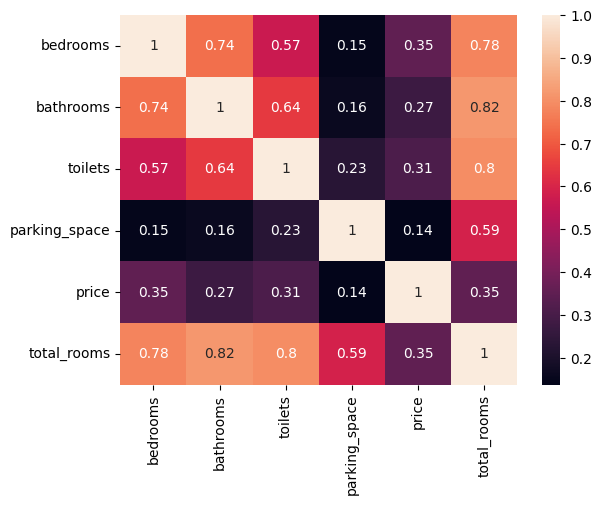

In [196]:
# Remove non-numeric columns (like 'type', 'location', etc.)
numeric_data = trimmed_data.drop(["town", "state", "title"], axis=1).select_dtypes(include='number')

corr = numeric_data.corr()
sns.heatmap(corr, annot=True)

In [197]:
print(corr)

               bedrooms  bathrooms   toilets  parking_space     price  \
bedrooms       1.000000   0.738976  0.567283       0.145789  0.351532   
bathrooms      0.738976   1.000000  0.643664       0.160500  0.272942   
toilets        0.567283   0.643664  1.000000       0.230746  0.310829   
parking_space  0.145789   0.160500  0.230746       1.000000  0.137196   
price          0.351532   0.272942  0.310829       0.137196  1.000000   
total_rooms    0.779390   0.815312  0.796585       0.591024  0.350656   

               total_rooms  
bedrooms          0.779390  
bathrooms         0.815312  
toilets           0.796585  
parking_space     0.591024  
price             0.350656  
total_rooms       1.000000  


In [198]:
X = trimmed_data.drop("price", t], axis=1)
y = trimmed_data["price"]


In [199]:
print(X,y)

       bedrooms  bathrooms  toilets  parking_space  title  town  state  \
2           4.0        5.0      5.0            4.0      2    95     14   
3           4.0        4.0      5.0            6.0      2     9     14   
4           4.0        4.0      5.0            2.0      4    95     14   
6           4.0        5.0      5.0            4.0      2    95     14   
8           1.0        1.0      1.0            1.0      2    95     14   
...         ...        ...      ...            ...    ...   ...    ...   
24318       4.0        5.0      5.0            4.0      4    95     14   
24320       3.0        4.0      4.0            5.0      2    95     14   
24323       4.0        5.0      5.0            4.0      2    95     14   
24324       3.0        4.0      4.0            3.0      0   136     14   
24325       4.0        5.0      5.0            4.0      2    95     14   

       total_rooms  
2             18.0  
3             19.0  
4             15.0  
6             18.0  
8     

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest_Regressor": RandomForestRegressor(),
    "XGBoost": XGBRegressor(learning_rate= 0.05, max_depth= 3, n_estimators= 900),
    # "Pipeline":  Pipeline(steps=[
    #     ('preprocessor', preprocessor),
    #     ('regressor', Ridge())  # or LinearRegression(), or whatever
     # ])
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: ")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")

Linear_Regression: 
  Mean Squared Error: 37002520.1268
  R2 Score: 0.2050
Random_Forest_Regressor: 
  Mean Squared Error: 28519994.2328
  R2 Score: 0.4562
XGBoost: 
  Mean Squared Error: 28485251.3374
  R2 Score: 0.4769


In [201]:
model = XGBRegressor(learning_rate= 0.05, max_depth= 3, n_estimators= 900)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=900,
             n_jobs=None, num_parallel_tree=None, ...)

In [202]:
    y_pred = model.predict(X_test)
    mse = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: ")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")

XGBoost: 
  Mean Squared Error: 28485251.3374
  R2 Score: 0.4769


In [203]:
jbl.dump(model, "House_price_prediction_model.model")

['House_price_prediction_model.model']

In [204]:
X.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'total_rooms'],
      dtype='object')